# DATA ANALYSIS

## 1. Ý nghĩa của thuộc tính:
- **Country**: Tên quốc gia
- Total Cases: Tổng số ca nhiễm
- New Cases: Số ca nhiễm mới
- Total Deaths: Tổng số ca tử vong
- New Deaths: Số ca tử vong mới
- Total Recovered: Tổng số ca hồi phục
- New Recovered: Số ca hồi phục mới
- Active Cases: Tổng số ca đang điều trị
- Serious, Critical: Số ca nghiêm trọng, nguy kịch
- Tot Cases/1M pop: Số ca nhiễm trên 1 triệu dân
- Deaths/1M pop: Số ca tử vong trên 1 triệu dân
- Total tests: Tổng số lần test
- Tests/1M pop: Số lần test trên 1 triệu dân
- Population: Dân số
- Continent: Châu lục
- 1 Case every X ppl: 1 ca nhiễm trên X dân
- 1 Death every X ppl: 1 ca tử vong trên X dân
- 1 Test every X ppl: 1 lần test trên X dân
- New Cases/1M pop: Số ca nhiễm mới trên 1 triệu dân
- New Deaths/1M pop: Số ca tử vong mới trên 1 triệu dân
- Active Cases/1M pop: Số ca đang điều trị trên 1 triệu dân

## 2. Phân tích các mối quan hệ nhờ trực quan

In [285]:
# Import thư viện: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import pandas

In [97]:
# Đọc dữ liệu:
covid_df = pd.read_csv('../data/modified/Modified_March_06_2023_corona_data.csv')
covid_df 


,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,...,Total tests,Tests/1M pop,Population,Continent,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,USA,105396817.0,0.0,1146740.0,0.0,102864696.0,0.0,1385381.0,2726.0,314800.0,...,1.167686e+09,3487657.0,3.348053e+08,North America,3.0,292.0,0.0,0.0,0.0,4138.0
1,India,44688101.0,0.0,530775.0,0.0,44154425.0,0.0,2901.0,0.0,31770.0,...,9.191891e+08,653468.0,1.406632e+09,Asia,31.0,2650.0,2.0,0.0,0.0,2.0
2,France,39638159.0,0.0,165030.0,0.0,39400459.0,706.0,72670.0,869.0,604383.0,...,2.714902e+08,4139547.0,6.558452e+07,Europe,2.0,397.0,0.0,0.0,0.0,1108.0
3,Germany,38210850.0,0.0,168397.0,0.0,37767300.0,17500.0,275153.0,0.0,455522.0,...,1.223324e+08,1458359.0,8.388360e+07,Europe,2.0,498.0,1.0,0.0,0.0,3280.0
4,Brazil,37076053.0,0.0,699276.0,0.0,36249161.0,0.0,127616.0,0.0,172164.0,...,6.377617e+07,296146.0,2.153536e+08,South America,6.0,308.0,3.0,0.0,0.0,593.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Vatican City,29.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,36295.0,...,0.000000e+00,0.0,7.990000e+02,Europe,28.0,0.0,0.0,0.0,0.0,0.0
227,Western Sahara,10.0,0.0,1.0,0.0,9.0,0.0,0.0,0.0,16.0,...,0.000000e+00,0.0,6.261610e+05,Africa,62616.0,626161.0,0.0,0.0,0.0,0.0
228,MS Zaandam,9.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.000000e+00,Unknown,0.0,0.0,0.0,0.0,0.0,0.0
229,Tokelau,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3628.0,...,0.000000e+00,0.0,1.378000e+03,Australia/Oceania,276.0,0.0,0.0,0.0,0.0,3628.0


### 2.1 Biểu đồ: 

In [266]:
# Lấy dữ liệu về các đồ thị quốc gia
df = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


In [83]:
#đổi tên cột cũng như đổi đổi tên các quốc qua cho đúng với data từ Geopandas
df = df.rename(columns={"name":"Country"})
covid_df =  covid_df.replace(['USA','UK','Bosnia and Herzegovina','S. Korea','Western Sahara','South Sudan','Dominican Republic','Solomon Islands','Equatorial Guinea','Falkland Islands','Eswatini','DPRK','DRC','UAE','CAR','Ivory Coast']
                 ,['United States of America','United Kingdom','Bosnia and Herz.','South Korea','W. Sahara', 'S. Sudan','Dominican Rep.', 'Solomon Is.','Eq. Guinea','Falkland Is.', 'eSwatini', 'North Korea','Dem. Rep. Congo','United Arab Emirates','Central African Rep.', "Côte d'Ivoire"])

In [263]:
temp = geopandas.GeoDataFrame(covid_df.set_index('Country').join(df[['Country','geometry']].set_index('Country'),lsuffix='_caller', rsuffix='_other',))

In [391]:
def MapPlot(Col, Norm = None,figsize =(30,18),fig = None, ax = None,data=temp):
    col_plot = Col
    if fig == None and ax == None:
        fig, ax = plt.subplots(1, figsize=figsize)
    cmap = 'cool'
    ax.axis('off')
    if type(Col) == type(""):
        col_plot = data[Col]
        ax.set_title(Col, fontdict={'fontsize': '25', 'fontweight': '3'})
    
    if Norm == None:
        data.plot(col_plot,ax = ax,linewidth = 1, cmap = cmap,edgecolor='black')
    else:
        data.plot(Norm(col_plot),ax = ax,linewidth = 1, cmap = cmap,edgecolor='black')
    ax.annotate('', xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
                verticalalignment='bottom', fontsize=10)
    if Norm == None:
        vmin =  col_plot.min()
        vmax =  col_plot.max()
    else:
        vmin =  Norm(col_plot.min())
        vmax =  Norm(col_plot.max())
    sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
    sm._A = []
    # Add the colorbar to the figure
    cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
    cbar = fig.colorbar(sm, cax=cbaxes)

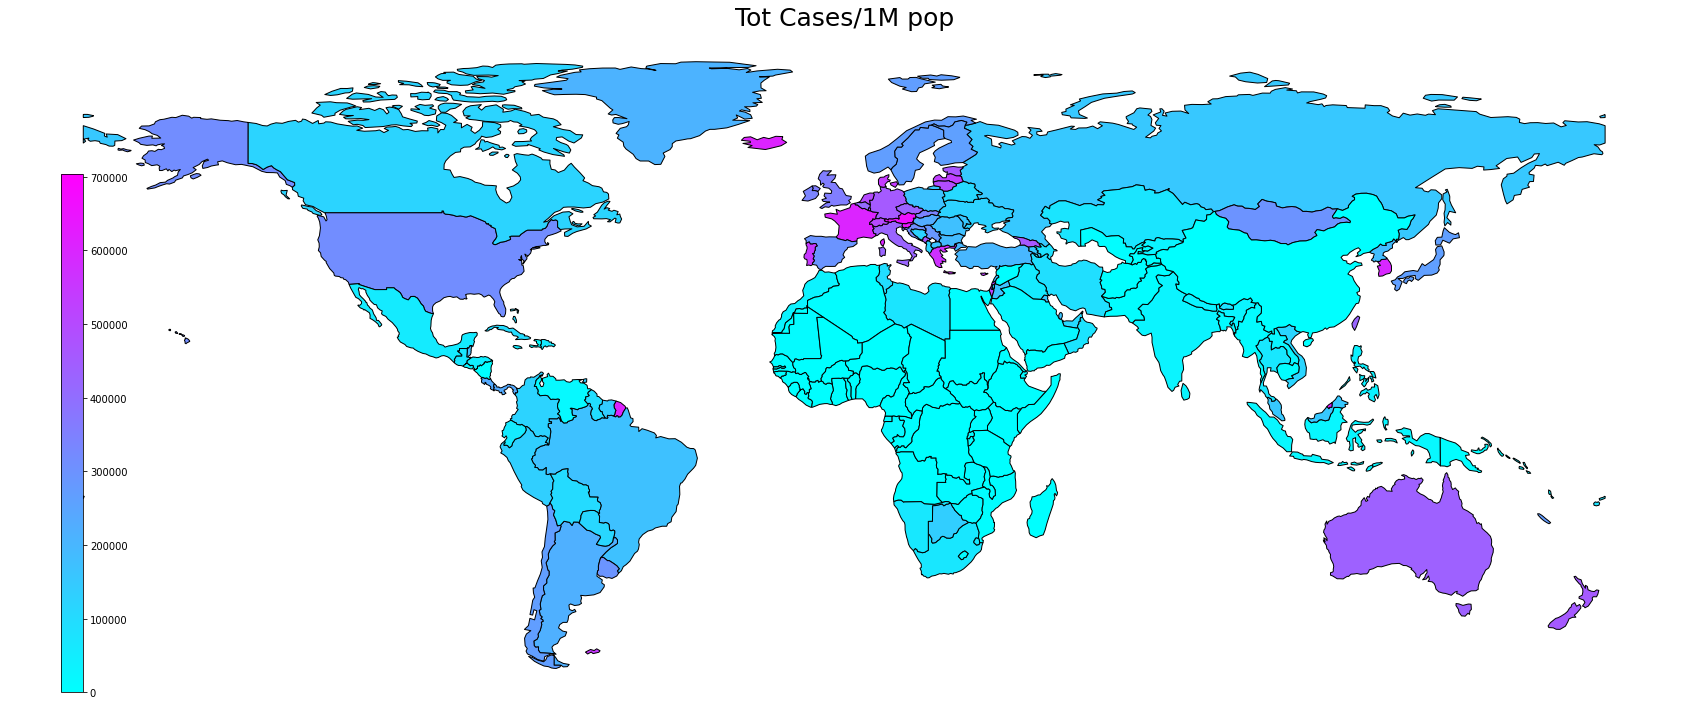

In [411]:
MapPlot('Tot Cases/1M pop')

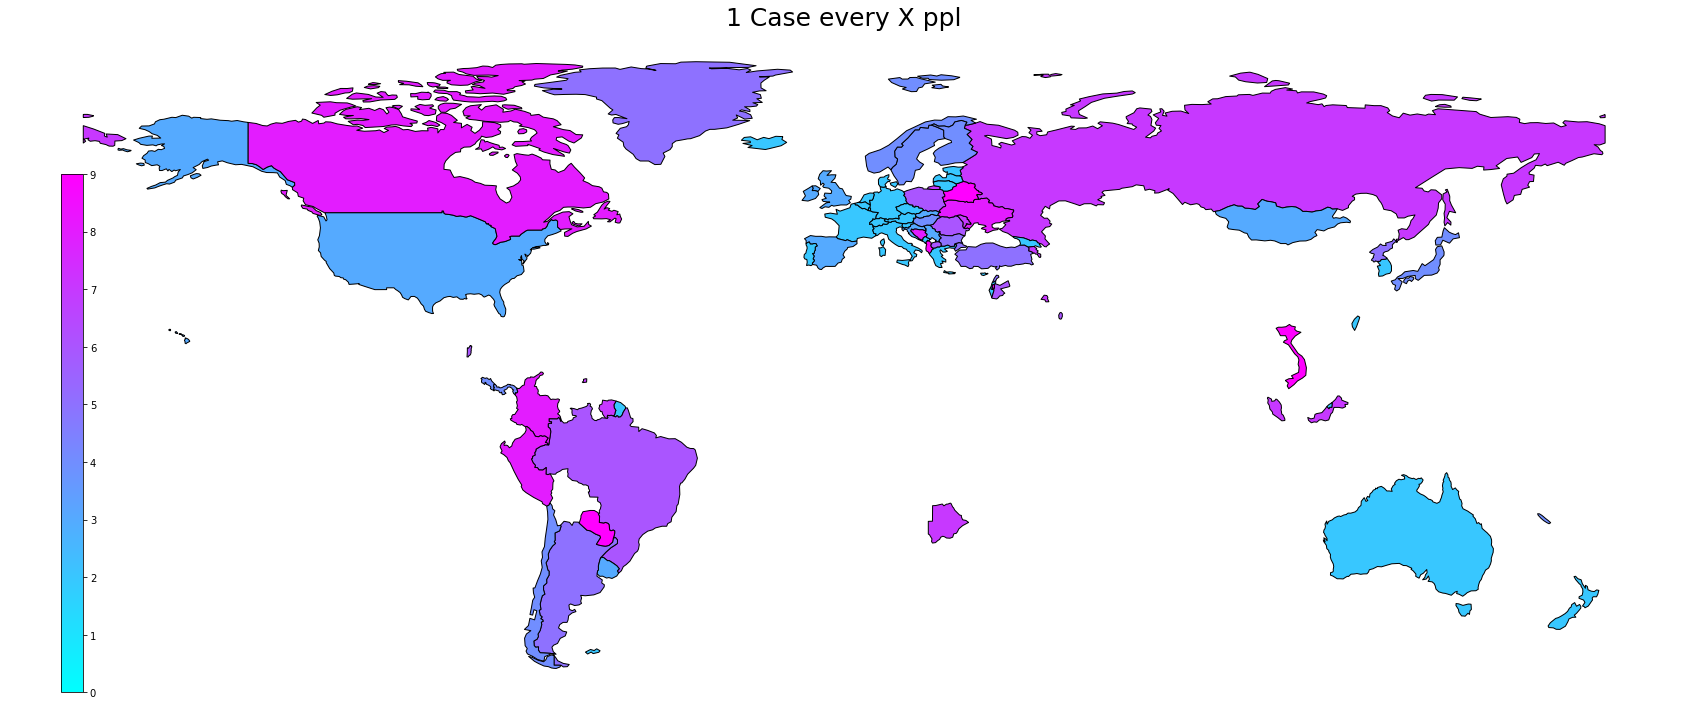

In [407]:
MapPlot(Col= '1 Case every X ppl', data = temp[temp['1 Case every X ppl'] < 10])

In [421]:
temp.loc['North Korea']

Total Cases                                                    4772813.0
New Cases                                                            0.0
Total Deaths                                                        74.0
New Deaths                                                           0.0
Total Recovered                                                4772739.0
New Recovered                                                        0.0
Active Cases                                                         0.0
Serious, Critical                                                    0.0
Tot Cases/1M pop                                                183636.0
Deaths/1M pop                                                        3.0
Total tests                                                          0.0
Tests/1M pop                                                         0.0
Population                                                    25990679.0
Continent                                          

In [418]:
temp.index

Index(['United States of America', 'India', 'France', 'Germany', 'Brazil',
       'Japan', 'South Korea', 'Italy', 'United Kingdom', 'Russia',
       ...
       'Saint Helena', 'Falkland Is.', 'Montserrat', 'Niue',
       'Diamond Princess', 'Vatican City', 'W. Sahara', 'MS Zaandam',
       'Tokelau', 'China'],
      dtype='object', name='Country', length=231)